In this notebook we use the BERT model with 5000 observation 

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("AMAZON_FASHION.json.gz",sep='\t',header=0)
df1

,"{""overall"": 5.0, ""verified"": true, ""reviewTime"": ""10 20, 2014"", ""reviewerID"": ""A1D4G1SNUZWQOT"", ""asin"": ""7106116521"", ""reviewerName"": ""Tracy"", ""reviewText"": ""Exactly what I needed."", ""summary"": ""perfect replacements!!"", ""unixReviewTime"": 1413763200}"
0,"{""overall"": 2.0, ""vote"": ""3"", ""verified"": true..."
1,"{""overall"": 4.0, ""verified"": false, ""reviewTim..."
2,"{""overall"": 2.0, ""verified"": true, ""reviewTime..."
3,"{""overall"": 3.0, ""verified"": false, ""reviewTim..."
4,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
...,...
883630,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
883631,"{""overall"": 5.0, ""vote"": ""2"", ""verified"": true..."
883632,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."
883633,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."


In [2]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rt', encoding='utf-8')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('AMAZON_FASHION.json.gz')
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
883631,5.0,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,NaN,NaN,NaN
883632,5.0,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2,NaN,NaN
883633,3.0,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,NaN,NaN,NaN
883634,3.0,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,NaN,NaN,NaN


In [3]:
newdf = df.sample(n=5000, random_state=42) #getting a sample data of 1000 from the existing data set with the random state 42 to unsure the reproducibility
newdf   #new data set with 1000 random rows is called as newdf

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
87569,2.0,False,"08 24, 2014",AWIYG7HFJJEIB,B007XD6K1U,osiris,nut Malo es very cheap,Two Stars,1408838400,NaN,NaN,NaN
691612,1.0,True,"06 14, 2016",A8Q2DT85Q8CAN,B01423Q1E4,Waistin$,It seems the sizing of this is way off. I rea...,Entirely too small!,1465862400,NaN,NaN,NaN
204341,1.0,True,"04 30, 2016",ANAE9TUXKTR6X,B00LWZH8C0,peter politano,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,1461974400,NaN,{'Color:': ' #M01. 2 Pairs: Steel + Gold'},NaN
625152,2.0,True,"03 28, 2016",A2JK19L9NH65JB,B00VPQXYW4,Amazon Customer,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,1459123200,NaN,NaN,NaN
457145,5.0,True,"10 11, 2016",A29VT82OW77PZ7,B00D7UX1YM,Apostle Arthur Young,I love this wallet,Five Stars,1476144000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
338797,1.0,True,"02 26, 2016",A3R55YB5KE2G6H,B0185GSQOC,Amazon Customer,Turned colors in one day.,One Star,1456444800,NaN,{'Size:': ' 6'},NaN
560604,5.0,True,"10 4, 2015",A3DKB33UNXQD3U,B00NUOTS1A,Jackline Browder,"Light but just as expected, I love it, and rec...","I love it, and received",1443916800,NaN,NaN,NaN
288822,5.0,True,"07 11, 2018",AERCW15CKGOVS,B00ZUA6AJK,Monica Hill,"I love these socks. I bought them for myself, ...",High quality for a low price,1531267200,NaN,{'Color:': ' 8 Pack-art'},NaN
114145,5.0,True,"10 19, 2015",A2ML1JJ316F1BO,B000J4AGI8,Jean M Ballard,Great wedding gift,Five Stars,1445212800,NaN,NaN,NaN


In [4]:
new_df = newdf.dropna(subset=['reviewText']).reset_index(drop=True) #dropping missing or null values (will be missing 2 rows)

In [5]:
my_columns = ['overall', 'verified', 'reviewerID', 'reviewText', 'summary']

# Create a new DataFrame 'mydf' with only the selected columns
mydf = new_df.loc[:, my_columns]
mydf

,overall,verified,reviewerID,reviewText,summary
0,2.0,False,AWIYG7HFJJEIB,nut Malo es very cheap,Two Stars
1,1.0,True,A8Q2DT85Q8CAN,It seems the sizing of this is way off. I rea...,Entirely too small!
2,1.0,True,ANAE9TUXKTR6X,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...
3,2.0,True,A2JK19L9NH65JB,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...
4,5.0,True,A29VT82OW77PZ7,I love this wallet,Five Stars
...,...,...,...,...,...
4990,1.0,True,A3R55YB5KE2G6H,Turned colors in one day.,One Star
4991,5.0,True,A3DKB33UNXQD3U,"Light but just as expected, I love it, and rec...","I love it, and received"
4992,5.0,True,AERCW15CKGOVS,"I love these socks. I bought them for myself, ...",High quality for a low price
4993,5.0,True,A2ML1JJ316F1BO,Great wedding gift,Five Stars


In [6]:
def cal_sentiment(overall):                #function to determine the sentiment
    if overall > 3:
        return 'Positive'
    elif overall     == 3:
        return 'Neutral'
    else:
        return 'Negative'

mydf['Sentiment of Star Ratings'] = mydf['overall'].apply(cal_sentiment)        # Apply the function to create the 'Star Ratings' column
mydf

,overall,verified,reviewerID,reviewText,summary,Sentiment of Star Ratings
0,2.0,False,AWIYG7HFJJEIB,nut Malo es very cheap,Two Stars,Negative
1,1.0,True,A8Q2DT85Q8CAN,It seems the sizing of this is way off. I rea...,Entirely too small!,Negative
2,1.0,True,ANAE9TUXKTR6X,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,Negative
3,2.0,True,A2JK19L9NH65JB,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,Negative
4,5.0,True,A29VT82OW77PZ7,I love this wallet,Five Stars,Positive
...,...,...,...,...,...,...
4990,1.0,True,A3R55YB5KE2G6H,Turned colors in one day.,One Star,Negative
4991,5.0,True,A3DKB33UNXQD3U,"Light but just as expected, I love it, and rec...","I love it, and received",Positive
4992,5.0,True,AERCW15CKGOVS,"I love these socks. I bought them for myself, ...",High quality for a low price,Positive
4993,5.0,True,A2ML1JJ316F1BO,Great wedding gift,Five Stars,Positive


In [7]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification #we use bert tokenization method to tokenize the input data 
import torch
import requests
import re




train_df, test_df = train_test_split(mydf, test_size=0.2, random_state=42) # Split the data into training and testing sets


tokenizer = AutoTokenizer.from_pretrained('LiYuan/amazon-review-sentiment-analysis') # Load the pretrained BERT model and tokenizer
my_model = AutoModelForSequenceClassification.from_pretrained('LiYuan/amazon-review-sentiment-analysis')


def sentiment_score(review): # Function to calculate sentiment score
    tokens = tokenizer.encode(review, return_tensors='pt',truncation=True, padding=True)
    result = my_model(tokens)
    return int(torch.argmax(result.logits)) + 1


test_df['Predicted Rating'] = test_df['reviewText'].apply(lambda x: sentiment_score(x[:512])) # Apply the sentiment_score function to the testing set

In [10]:
def cal_sentiment(Overall):                #function to determine the sentiment
    if Overall > 3:
        return 'Positive'
    elif Overall     == 3:
        return 'Neutral'
    else:
        return 'Negative'

test_df['Sentiment of Predicted Ratings'] = test_df['Predicted Rating'].apply(cal_sentiment)        # Apply the function to create the 'Star Ratings' columntest_df

In [11]:
test_df

,overall,verified,reviewerID,reviewText,summary,Sentiment of Star Ratings,Predicted Rating,Sentiment of Predicted Ratings
84,3.0,True,A2THPUSI13FSJ,These run a liittle small and are too tight. F...,Tighty whiteys is right,Neutral,3,Neutral
3036,5.0,True,A12NKGKEO6JAC2,It helps remind me that I'll always be within ...,Five Stars,Positive,5,Positive
1497,5.0,True,A1Y4JBCYHOAJ7T,"As with most Carhartt men's clothing, you have...",Typical Carhartt quality work pants!,Positive,4,Positive
653,5.0,True,ABO9S1GIIZIZJ,Hit of the party,Five Stars,Positive,5,Positive
877,5.0,True,A2AGHNC7U7JY81,Another gorgeous shirt from Neon Buddha. They ...,They always do a great job with cat and drape ...,Positive,5,Positive
...,...,...,...,...,...,...,...,...
3565,5.0,True,A3JS15MCG78K0H,I love the color and I get so many compliments...,Beautiful color.,Positive,5,Positive
2991,5.0,False,AVVD46C6QKP1J,I love it. Fits my ear perfectly! Super cute!,Love it!,Positive,5,Positive
2655,3.0,True,A2UEO7432DF2N5,Love the colors and the grippies and especiall...,"Runs Small, but super cute",Neutral,4,Positive
3311,4.0,True,A13T01WU8VKZ4F,Fun costume. Looks like a child painted the pr...,Fun,Positive,4,Positive


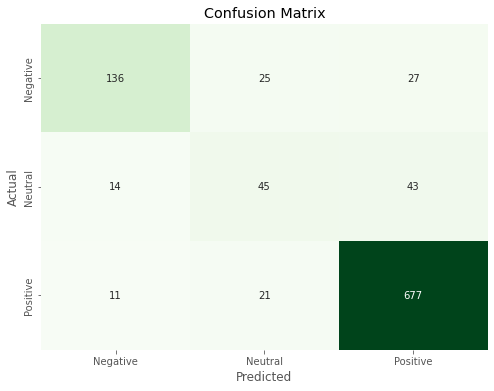

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
from sklearn.metrics import confusion_matrix
import numpy as np


label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2} # Define a mapping from string labels to numerical labels


y_true = np.array([label_mapping[label] for label in test_df['Sentiment of Star Ratings']]) # Convert the actual and predicted labels to numerical values
y_pred = np.array([label_mapping[label] for label in test_df['Sentiment of Predicted Ratings']])


conf_matrix = confusion_matrix(y_true, y_pred) # Calculate the confusion matrix


classes = list(label_mapping.keys()) # Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:

y_true = test_df['Sentiment of Star Ratings']  # Actual ratings
y_pred = test_df['Sentiment of Predicted Ratings']  # Predicted ratings


conf_matrix = confusion_matrix(y_true, y_pred) # Calculate the confusion matrix


report = classification_report(y_true, y_pred)


print("Confusion Matrix:") # Print the confusion matrix and classification report
print(conf_matrix)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[136  25  27]
 [ 14  45  43]
 [ 11  21 677]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.72      0.78       188
     Neutral       0.49      0.44      0.47       102
    Positive       0.91      0.95      0.93       709

    accuracy                           0.86       999
   macro avg       0.75      0.71      0.73       999
weighted avg       0.85      0.86      0.85       999

